##  Fake News  Detection
<p><img src="datasets/newspaper.jpg" alt="Project Fake News" width="600px"></p>

### Importing Required Libraries

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
%matplotlib inline

### Preparing Our Dataset

In [167]:
true_news,fake_news=pd.read_csv('datasets/True.csv'),pd.read_csv('datasets/Fake.csv')
display(true_news.head());display(fake_news.head())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Add New Column called 'category' for each Fake and True News

In [168]:
true_news['category'],fake_news['category']=1,0

In [169]:
true_news.shape,fake_news.shape

((21417, 5), (23481, 5))

### Merging Data 


In [170]:
all_news=pd.concat([true_news,fake_news])


### Visualizing Distribution of Fake and Real News

Text(0.5, 1.0, 'Distribution of Fake -> 0 | Real -> 1 News')

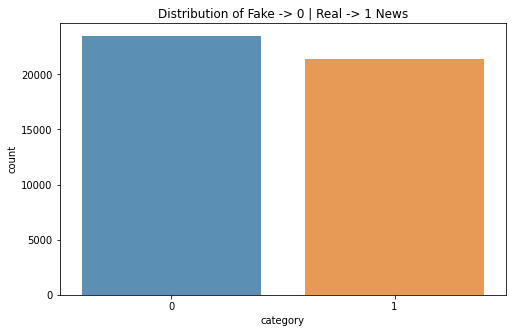

In [171]:
plt.figure(figsize = (8,5))
sns.countplot(x = all_news['category'], alpha = 0.8)
plt.title('Distribution of Fake -> 0 | Real -> 1 News')

In [172]:
all_news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [173]:
all_news.describe()

,category
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [174]:
all_news.shape

(44898, 5)

In [175]:
all_news.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [176]:
all_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Preprocessing Data

In [177]:
all_news=all_news.drop_duplicates()
all_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44689 non-null  object
 1   text      44689 non-null  object
 2   subject   44689 non-null  object
 3   date      44689 non-null  object
 4   category  44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [178]:
all_news=all_news.reset_index(drop=True)

In [179]:
all_news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [180]:
all_news.drop(columns=['date'],axis=1,inplace=True)
all_news.head()

,title,text,subject,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [181]:
all_news.drop(["title"],axis=1,inplace=True)
all_news.head(10)

,text,subject,category
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,1
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,1
7,The following statements were posted to the ve...,politicsNews,1
8,The following statements were posted to the ve...,politicsNews,1
9,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,1


In [182]:
def text_cleaning(text): 
    all_list = [char for char in text if char not in string.punctuation]
    clean_text=''.join(all_list)
    clean_text=clean_text.lower()
    return clean_text
all_news['text']=all_news['text'].apply(text_cleaning)
all_news.head()

,text,subject,category
0,washington reuters the head of a conservative...,politicsNews,1
1,washington reuters transgender people will be...,politicsNews,1
2,washington reuters the special counsel invest...,politicsNews,1
3,washington reuters trump campaign adviser geo...,politicsNews,1
4,seattlewashington reuters president donald tr...,politicsNews,1


In [183]:
stop=stopwords.words('english')
all_news['text'] = all_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
all_news.head()

,text,subject,category
0,washington reuters head conservative republica...,politicsNews,1
1,washington reuters transgender people allowed ...,politicsNews,1
2,washington reuters special counsel investigati...,politicsNews,1
3,washington reuters trump campaign adviser geor...,politicsNews,1
4,seattlewashington reuters president donald tru...,politicsNews,1


### Visualizing Real Words and Fake Words

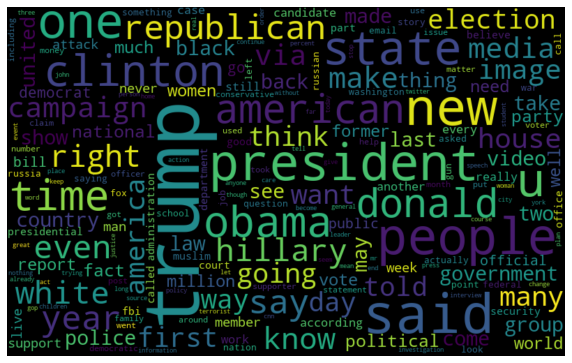

In [184]:
fake=all_news[all_news['category']==0]
all_words=''.join([word for word in fake['text']])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

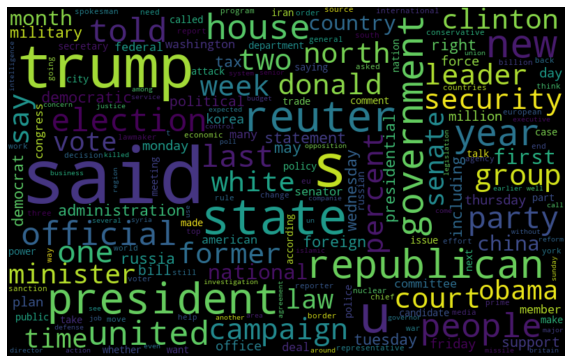

In [185]:
real=all_news[all_news['category']==1]
all_words=''.join([word for word in real['text']])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Split Data

In [186]:
X,Y=all_news['text'],all_news['category']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [187]:
display(X_train.head())
display(Y_train.head())

20870    beirut reuters syrian army allied forces come ...
43207    jay dyer 21st century wirein famous treatise m...
8444     washington reuters democratic presidential nom...
37580    lame effort score political points hillary cli...
41994    considered child abuseas birthday entertainmen...
Name: text, dtype: object

20870    1
43207    0
8444     1
37580    0
41994    0
Name: category, dtype: int64

### Building The Model (Decision Tree)

In [188]:
ds = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=50))])
# Fitting the model
model = ds.fit(X_train, Y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

accuracy: 99.63%


### Confusion Matrix

In [189]:
cm = confusion_matrix(Y_test,prediction)
cm

array([[4687,   19],
       [  14, 4218]], dtype=int64)

In [190]:
cm = pd.DataFrame(cm , index = ['Fake','Real'] , columns = ['Fake','Real'])

Text(69.0, 0.5, 'Actual')

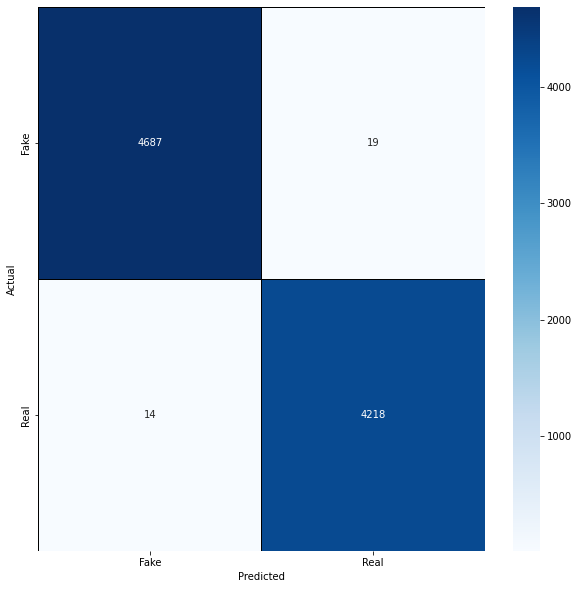

In [191]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Real'] , yticklabels = ['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")